In [175]:

%load_ext abjad.ext.ipython

The abjad.ext.ipython extension is already loaded. To reload it, use:
  %reload_ext abjad.ext.ipython


In [176]:
voice = Voice("c'4 ~ c'16 c'8. r4 r16 c'8.")

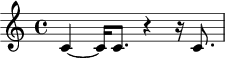

In [177]:
show(voice)

In [199]:
def print_ties(music):
    fused_notes = Voice()
    for logical_tie in iterate(music).by_logical_tie():
        print(logical_tie)
        
def fuse_notes(music):
    fused_notes = Voice()
    for logical_tie in iterate(music).by_logical_tie():
        if isinstance(logical_tie[0], Note):
            multiplier = Multiplier(logical_tie.written_duration)
            pitch = logical_tie[0].written_pitch
            note = Note(pitch, (1,1))
            attach(multiplier, note)
            fused_notes.append(note)
        elif isinstance(logical_tie[0], Chord):
            multiplier = Multiplier(logical_tie.written_duration)
            pitches = logical_tie[0].note_heads
            chord = Chord(pitches, (1,1))
            attach(multiplier, chord)
            fused_notes.append(chord)
        elif isinstance(logical_tie[0], Rest):
            duration = logical_tie.written_duration
            rest = Rest(duration)
            fused_notes.append(rest)
    return fused_notes

def fuse_rests(music):
    for run in iterate(music).by_run((Rest)):
        print(run)
        selection = Selection(run)
        print(selection)

In [200]:
voice = fuse_notes(voice)

In [201]:
f(voice)

\new Voice {
    c'1 * 1
    c'1 * 1
    r4
    r16
    c'1 * 1
}
